# 실습8. Ising model with 1-dimensional spin array

1. 전역적인 상호작용을 하는 1-d spin array에서, 메트로폴리스 알고리즘을 활용해 자화도 $m=|\sum_iS_i|$을 구하세요. \\
1) 스핀 행렬과 상호작용 행렬을 정의하세요. 전자의 개수 N은 100개로 합니다. (10점) \\
2) 에너지를 계산하는 함수를 구현하세요. (10점) \\
3) 온도 T=10K일 때, monte-carlo method를 10000번 반복하여 스핀 행렬을 평형화시키고, 추가로 10000번 반복하여 평균적인 자화도를 계산하세요. (30점)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=100
S = 2*(np.random.rand(N)>0.5)-1

A = np.ones([N,N])/N #상호작용 행렬, 에너지 계산에 필요

def calE(S, A):
  return -0.5*S@A@S.T

T=10; iteration = 10000
def MC(S, A, T):
  Snew = np.copy(S)
  k = np.random.randint(N)
  Snew[k]*=-1
  deltaE = calE(Snew, A) - calE(S, A)
  if deltaE < 0 or np.random.rand()<np.exp(-deltaE/T):
    S=Snew
  return S

#평형화
for i in range(iteration):
  S = MC(S, A, T)

m=0
for i in range(iteration):
  S = MC(S, A, T)
  m += np.abs(np.sum(S))
m=m/iteration

print(m)

8.334


위의 코드는 주어진 1~3번 문제를 나타내는 코드이다. 변수 N은 전자의 개수를 나타내며 문제에서 주어진 대로 100으로 설정하였다. 리스트 S는 스핀행렬을 나타내며 numpy 모듈의 random.rand 함수를 이용해 같은 확률로 1 또는 -1의 값을 갖는 길이 N의 행렬을 저장한다. 리스트 A는 상호작용 행렬을 나타내며 문제에서 전역적인 상호작용을 한다고 하였으므로 numpy 모듈의 ones함수를 활용해 모든 원소가 1인 NxN 크기의 행렬을 만든 뒤 N으로 나누어 설정하였다. \\
사용자 정의 함수 calE는 에너지를 구하는 함수로 변수 S와 A를 입력받아 $-0.5\mathrm{SAS^T}$의 값을 반환한다. \\
변수 T는 온도를 나타내며 문제에서 주어진대로 10으로 설정하였으며, 변수 iteration은 시행횟수를 나타내는 변수로 10000으로 설정하였다. 사용자 정의 함수 MC는 monte-carlo method를 수행하는 함수이다. 변수 S, A, T를 입력받아 변수 Snew에 S와 동일한 값을 저장한 뒤 Snew의 임의의 원소에 대해 스핀을 반전시킨다. 변수 deltaE는 Snew에서의 에너지 변화량을 계산하여 저장한다. 이후 if문을 통해 deltaE의 값이 음수이거나(에너지적으로 안정) $e^{\frac{-\Delta E}{T}}$이 랜덤한 값보다 클 경우에는 스핀 배열을 새로운 상태로 업데이트하여 최종적으로 S를 반환한다. \\
이후 for문을 활용해 monte-carlo method를 10000번 반복하여 스핀 행렬을 평형화 시켰으며, 추가로 10000번 반복하여 평균적인 자화도 m을 계산하였다. 변수 m은 자화도를 나타내며 초깃값을 0으로 설정하였다. for문을 활용해 monte-carlo method를 한번 시행할 때 마다 자화도를 구하여 기존의 m값에 계속해서 더하였으며, for문이 끝난 뒤 시행횟수로 나누어주어 평균 자화도 m=$\langle m \rangle$를 계산하였다. 이후 print함수를 이용해 m의 값을 출력하였으며, 8.334의 값이 도출되었다.

4) 온도 T를 np.arange(0.1, 2,1, 0.1)로 설정하여 3)의 과정을 반복하고, 자화도 m을 T에 대한 그래프로 그리세요. (50점)

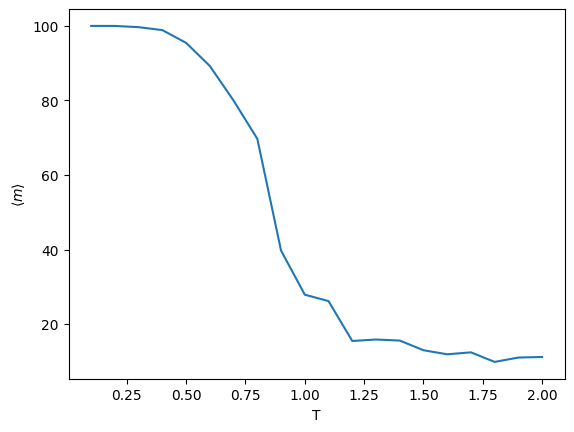

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=100
T_arr = np.arange(0.1, 2.1, 0.1)
m_arr = []

A = np.ones([N,N])/N #상호작용 행렬, 에너지 계산에 필요

def calE(S, A):
  return -0.5*S@A@S.T

iteration = 10000
def MC(S, A, T):
  Snew = np.copy(S)
  k = np.random.randint(N)
  Snew[k]*=-1
  deltaE = calE(Snew, A) - calE(S, A)
  if deltaE < 0 or np.random.rand()<np.exp(-deltaE/T):
    S=Snew
  return S

for T in T_arr:
  S = 2*(np.random.rand(N)>0.5)-1
  #평형화
  for i in range(iteration):
    S = MC(S, A, T)

  m=0
  for i in range(iteration):
    S = MC(S, A, T)
    m += np.abs(np.sum(S))
  m=m/iteration
  m_arr.append(m)

plt.plot(T_arr, m_arr)
plt.xlabel('T')
plt.ylabel(r'$\langle m \rangle$')
plt.show()

위의 코드는 온도 T값에 따른 자화도 m값을 그래프로 나타내는 코드이다. 전반적인 초기변수와 사용자 정의 함수는 1~3번 문제와 동일하게 설정하였다. 변수 T_arr는 문제에서 주어진 온도의 배열을 저장하며, m_arr는 온도에 따른 자화도 m의 값을 저장하는 리스트이다. for문을 활용해 3번 문제와 동일한 과정으로 T_arr 내의 T값에 따라 10000번의 monte-carlo method를 적용해 스핀 행렬을 평형화 시킨 뒤, 추가로 10000번 반복하여 평균적인 자화도 m=$\langle m \rangle$을 구하였다. 이후 m_arr에 m값을 추가하였다. \\
이후 x축이 T_arr이고 y축이 m_arr인 그래프를 그려 주어진 문제를 구현하였다.